In [6]:
import pandas as pd
import numpy as np
# these are for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#import folium 
df=pd.read_csv("Police_Department_Incidents_Year_2016_.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150851 entries, 0 to 150850
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150851 non-null  int64  
 1   Category    150851 non-null  object 
 2   Descript    150851 non-null  object 
 3   DayOfWeek   150851 non-null  object 
 4   Date        150851 non-null  object 
 5   Time        150851 non-null  object 
 6   PdDistrict  150850 non-null  object 
 7   Resolution  150851 non-null  object 
 8   Address     150851 non-null  object 
 9   X           150851 non-null  float64
 10  Y           150851 non-null  float64
 11  Location    150851 non-null  object 
 12  PdId        150851 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 15.0+ MB


In [10]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.40340479147905)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.40340479147905)",12005827212168
2,160075430,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Tuesday,01/26/2016 12:00:00 AM,19:20,INGLESIDE,NONE,600 Block of ANDERSON ST,-122.415432,37.735398,"(37.73539756503084, -122.4154323065427)",16007543004013
3,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.729980967299596, -122.38885620429184)",14105926363010
4,160782306,MISSING PERSON,FOUND PERSON,Monday,09/19/2016 12:00:00 AM,05:30,PARK,NONE,2000 Block of ELLIS ST,-122.439954,37.781359,"(37.78135894167133, -122.43995406172893)",16078230675000


In [14]:
df.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [15]:
df['PdDistrict'].fillna(df['PdDistrict'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

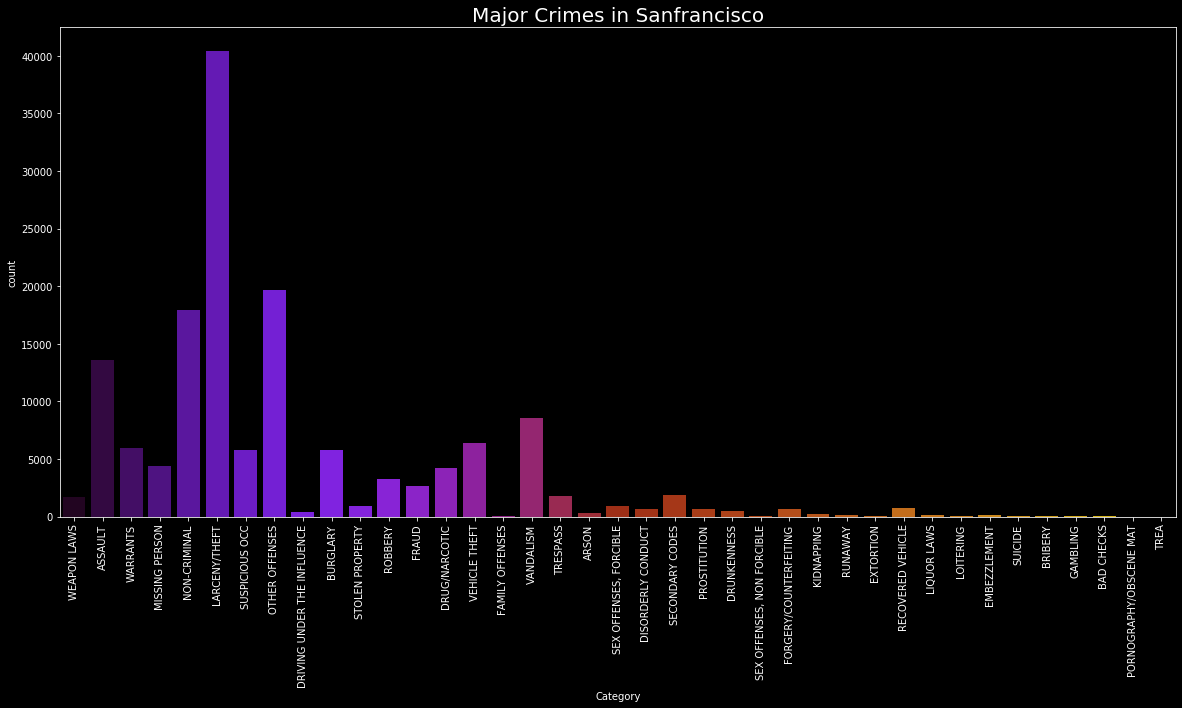

In [19]:
# different categories of crime
plt.rcParams['figure.figsize']=(20,9)
plt.style.use('dark_background')

sns.countplot(df['Category'],palette='gnuplot')
plt.title("Major Crimes in Sanfrancisco",fontweight = 30, fontsize = 20)
plt.xticks(rotation=90)
plt.show()

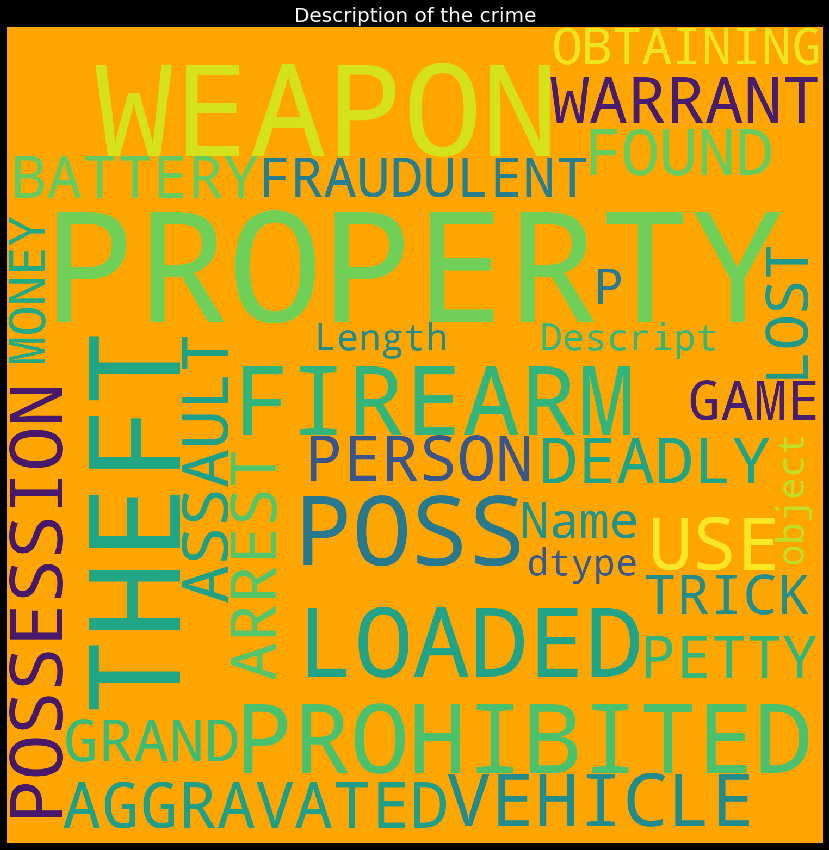

In [40]:
# description of the crime
from wordcloud import WordCloud
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fast')

wc=WordCloud(background_color='orange', width=1500, height=1500).generate(str(df['Descript']))
plt.title("Description of the crime",fontsize=20)
plt.imshow(wc)
plt.axis('off')
plt.show()

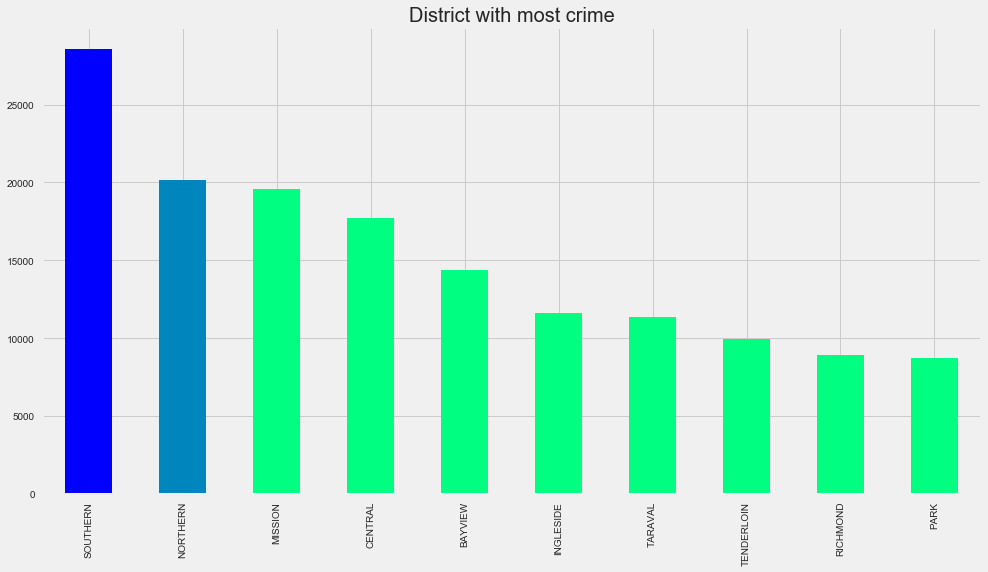

In [54]:
from wordcloud import WordCloud
plt.rcParams['figure.figsize']=(20,9)
plt.style.use("fivethirtyeight")

df['PdDistrict'].value_counts().plot.bar(color=color,figsize=(15,8))
plt.title("District with most crime",fontsize=20)
plt.xticks(rotation=90)
plt.show()

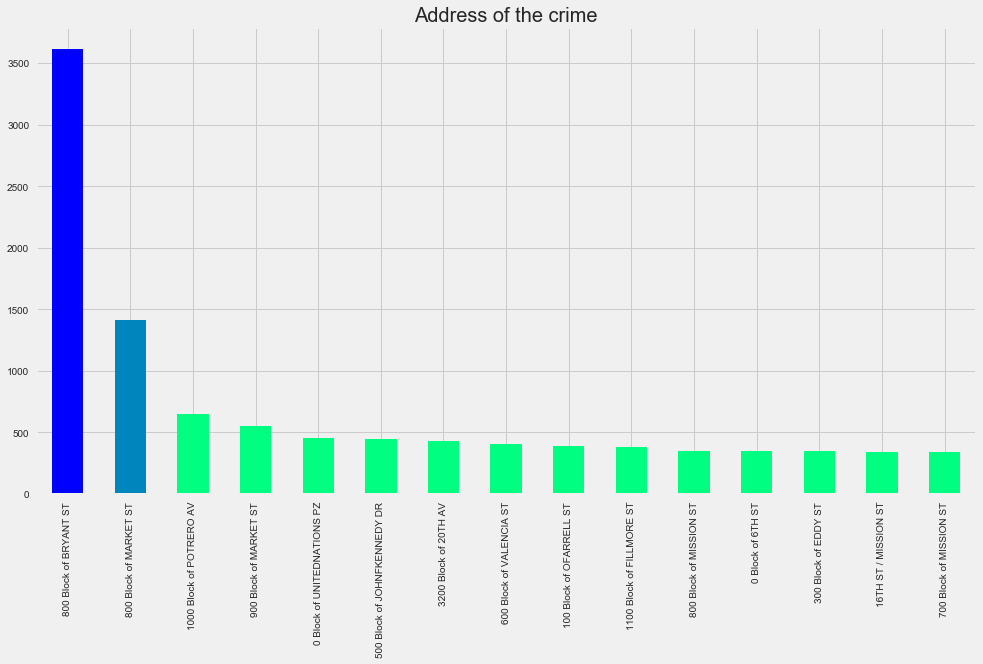

In [61]:
# Top 15 address in sanfranscisco crime 
from wordcloud import WordCloud
plt.rcParams['figure.figsize']=(20,9)
plt.style.use('fivethirtyeight')

df['Address'].value_counts().head(15).plot.bar(color=color,figsize=(15,8))
plt.title("Address of the crime",fontsize=20)
plt.xticks(rotation=90)
plt.show()

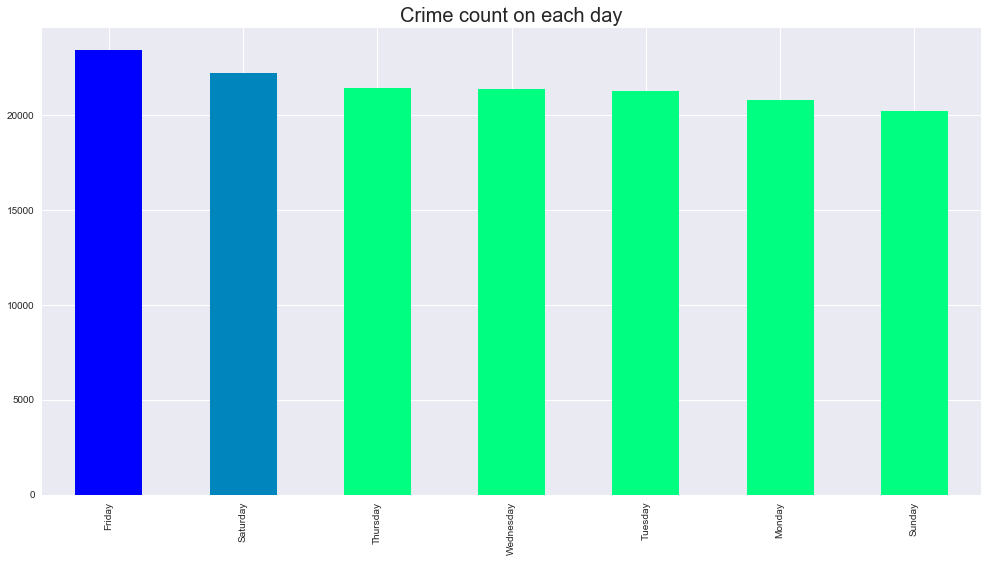

In [63]:

plt.style.use('seaborn')

choose_color=plt.cm.summer(np.linspace(0,10,20))
df['DayOfWeek'].value_counts().plot.bar(color = color,figsize=(15,8))
plt.xticks(rotation=90)
plt.title('Crime count on each day',fontsize = 20)
plt.show()

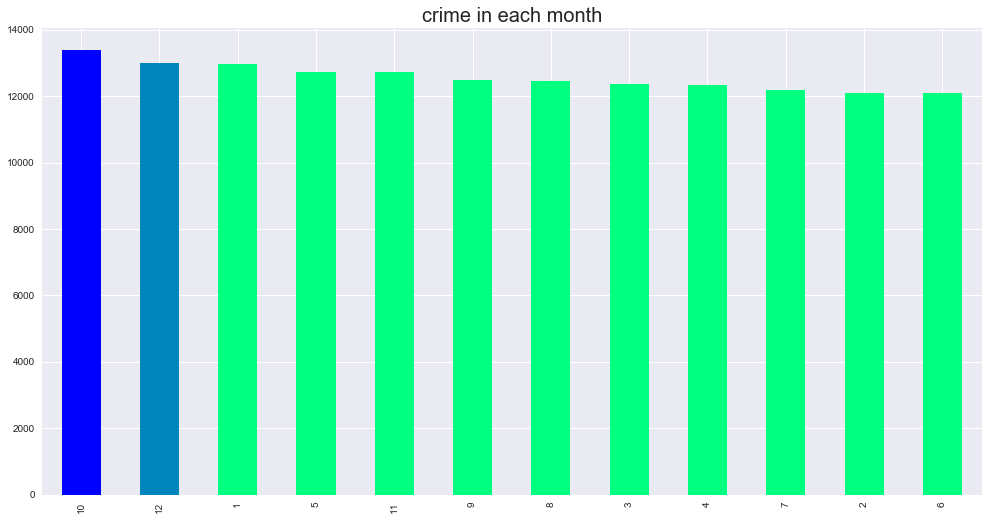

In [69]:
# crime in each month
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Month'].value_counts().plot.bar(color = color,figsize=(15,8))
plt.xticks(rotation=90)
plt.title('crime in each month',fontsize = 20)
plt.show()

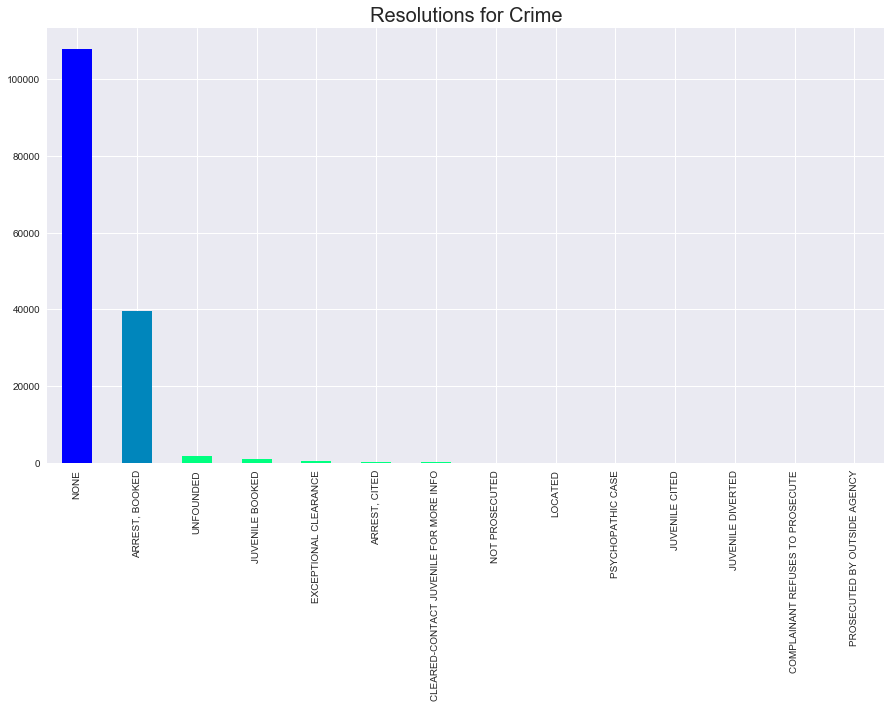

In [52]:
# Regions with count of crimes
plt.style.use('seaborn')

choose_color=plt.cm.summer(np.linspace(0,10,20))
df['Resolution'].value_counts().plot.bar(color = color,figsize=(15,8))
plt.xticks(rotation=90)
plt.title('Resolutions for Crime',fontsize = 20)
plt.show()